<h1 align="center">Tea Time Python: SciPy Topics</h1>
License: [CC-BY-SA 4.0](https://creativecommons.org/licenses/by-sa/4.0/)  
The previous three notebooks have given us the tools we need to explore more specific and quite possibly more useful topics. In this notebook we will cover:
* Interpolation
* Numerical Derivatives
* Numerical Integrals
* Linear Algebra
* Fast Fourier Transform (FFT)

Many of these topics have courses built around them; this notebook is not intended to teach these topics. The purpose is to show how to use python (SciPy) to solve various problems in these areas. 

There are also a couple other SciPy topics that require more than simply calling the relevant function and may require you to build your own function that fit the routines in python. They require a bit more effort conceptually and in volume of code to execute in python. These topics are:
* Ordinary Differential Equations (ODE)
* Fitting/Optimization

They will not be covered in Tea Time unless I find that there is additional time left over. However, links to examples have been included in this notebook.

Solving problems related to all of these topics in python has quite a bit of value. One analogy is that python is like using a calculator to solve basic math problems: it makes things easier by solving problems for you as it often only requires the input. An extension to this concept is that SciPy is pretty good at processing larger volumes of data using arrays. However, there is more value than just having the code do all the work. There are a number of problems that cannot be solved analytically, but can be solved numerically by being a little bit creative. An example of this, which we will see shortly, is a function that cannot be inverted analytically. However, using an interpolating spline, it becomes possible to numerically invert the function.

A good resource for all of these topics is the course web page for Physics 250. I learned python taking this course and often use the page for reference. There are examples for many of these topics. If you cannot find what you are looking for in the examples, the prelabs and labs also have solutions and often go more in depth and give more specific examples.  
http://www.phys.cwru.edu/courses/p250/

Let's start by loading everything we will need. We have a wide array of topics, so we will need a number of tools. As I may have mentioned earlier, there is significant overlap between SciPy and numpy for some of these topics. For most of them we will stick to SciPy because it more tools available for each of them. For the FFT, we will use numpy.fft as opposed to scipy.signal simply because it has everything we need.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import scipy.interpolate as interp
import scipy.integrate as integ
import scipy.optimize as opt
import scipy.linalg as la
import scipy.special as sf
matplotlib.rc('font', size = 15)

## Interpolation and Derivatives
There are a number of options in the interpolate module. For one dimension there are three options that we will look into.

The first is a polynomial spline. **interp.lagrange** is good for small numbers of points. However, it is important to pay attention to the documentation. This option is not good for any more than 20 points.
>Warning: This implementation is numerically unstable. Do not expect to
>be able to use more than about 20 points even if they are chosen optimally.

The other two options are **interp.interp1d** and **interp.InterpolatedUnivariateSpline**. Both have their uses and limits. The biggest difference is that **interp1d** does not allow for extrapolation, which is often a good thing because extrapolation can be dangerous. The x input for **InterpolatedUnivariateSpline**  must be ascending or it will return a less than desireable spline.

Please note that making a spline involves creating a function class attribute. This function is the spline, in which you can input your x data and it will return the values for y.

In [3]:
interp?

In [4]:
interp.lagrange?

In [ ]:
interp.interp1d?

In [ ]:
interp.InterpolatedUnivariateSpline?

In [49]:
def yfunct(x):
    y = .5 * np.sin(x) + .5 * np.sin(x/2)
    return(y)

In [50]:
#Make a x data for high resolved function and spline
n = 1000
x = np.linspace(0,4*np.pi,n)
y = yfunct(x)

#select some random points in this curve to use for interopolation
splinepoints = 15
xsplinept = x[np.random.randint(n, size = splinepoints)]
xsplinept.sort()
ysplinept = yfunct(xsplinept)

polyspline = interp.lagrange(xsplinept, ysplinept)
cubicspline = interp.InterpolatedUnivariateSpline(xsplinept, ysplinept)

(-1.2, 1.2)

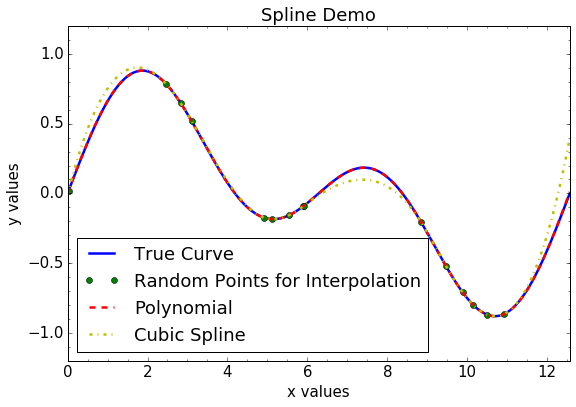

In [51]:
plt.figure(figsize=(9, 6))

plt.plot(x, y, linewidth = 2.5, label="True Curve")
plt.plot(xsplinept, ysplinept, 'o', label="Random Points for Interpolation")
plt.plot(x, polyspline(x), '--', linewidth = 2.5, label="Polynomial")
plt.plot(x, cubicspline(x), 'y-.', linewidth = 2.5, label="Cubic Spline")
plt.legend(loc = "best")
plt.xlabel('x values')
plt.ylabel('y values')
plt.title('Spline Demo')
plt.minorticks_on()
plt.xlim(0,4*np.pi)
plt.ylim(-1.2,1.2)

There are a number of ways to take the derivative of your function or data. Some ways are better than others, and some will take too long to teach in Tea Time. For more details, see the Physics 250 web page. Since we already know how to make a spline, taking the derviative from here is actually very easy. Also, using a spline to find the derivative reduces the impact of noise amplification when taking the derivative of noisy data. Please note that there are also smoothing options for the splines that we will not be covering. 

From the data that we already have, taking the derivative is simple. We just need to pass the spline function that we created a second argument: the degree of the derivative. It is a good idea to give the spline as much data to work with as possible, so we will increase the number of points that we use to  define our spline.

In [52]:
#Get more points for making the spline
splinepoints = 30
xsplinept = x[np.random.randint(n, size = splinepoints)]
xsplinept.sort()
ysplinept = yfunct(xsplinept)

cubicspline = interp.InterpolatedUnivariateSpline(xsplinept, ysplinept)

(-1.2, 1.5)

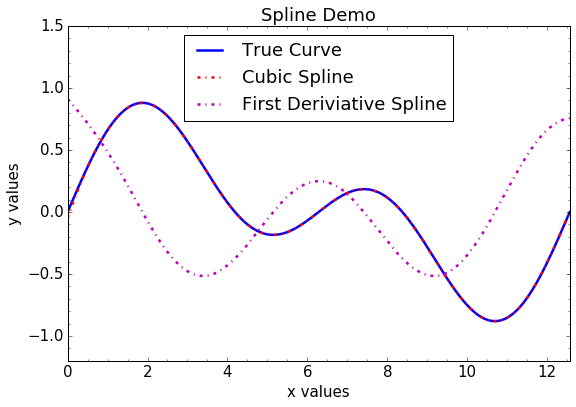

In [54]:
plt.figure(figsize=(9, 6))

plt.plot(x, y, linewidth = 2.5, label="True Curve")
#plt.plot(xsplinept, ysplinept, 'o', label="Random Points for Interpolation")
plt.plot(x, cubicspline(x), 'r-.', linewidth = 2.5, label="Cubic Spline")
plt.plot(x, cubicspline(x,1), 'm-.', linewidth = 2.5, label="First Deriviative Spline")
#plt.plot(x, cubicspline(x,2), 'y-.', linewidth = 2.5, label="Second Deriviative Spline")
plt.legend(loc = "best")
plt.xlabel('x values')
plt.ylabel('y values')
plt.title('Spline Demo')
plt.minorticks_on()
plt.xlim(0,4*np.pi)
plt.ylim(-1.2,1.5)

Inverting a function is relatively simple. We simply pass the the points to our chosen interpolating spline in the reverse order. Please note that the y values must be ascending in this case, so reversing the order may be necessary. In the example, both are increasing so this is not necessary.

In [23]:
#Create data for a function to invert
x = np.linspace(0,2.5,500)
y = x**3

In [24]:
invspline = interp.InterpolatedUnivariateSpline(y,x)

(0, 2)

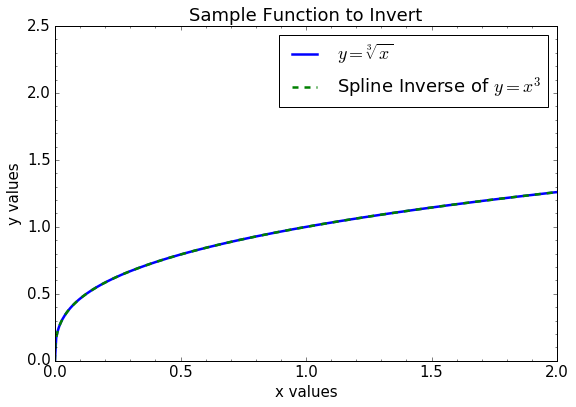

In [25]:
plt.figure(figsize=(9, 6))
plt.plot(x, x**(1./3), linewidth = 2.5, label="$y = \sqrt[3]{x}$")
plt.plot(y, invspline(y), '--', linewidth = 2.5, label="Spline Inverse of $y=x^3$")
plt.legend(loc = "best")
plt.xlabel('x values')
plt.ylabel('y values')
plt.title('Sample Function to Invert')
plt.minorticks_on()
plt.xlim(0,2)

## Numeric Integrals

There are a number of methods for integrating numeric data. For the sake of time we will not discuss them in detail and just skip to work horse function in scipy.integrate. This function is **integ.quad**, which is a general tool that utilizes a number of techniques. You must pass it three arguments: the functions to integrate (this can be a spline if your data does not have a function), the lower limit, and the upper limit.  It will return the value of the integral and an error, which should be very close to zero. Note that this is just the error of the algorithm used by quad, not your true error.

Using this function may require loops.

In [26]:
integ.quad?

In [28]:
integ.quad(np.cos,0,np.pi/2)

0.9999999999999999

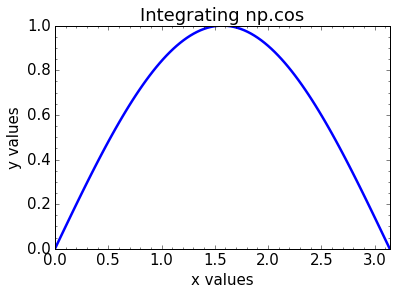

In [29]:
#integrate over a cosine function from zero to pi
x = np.linspace(0, np.pi, 100)
y = np.zeros(len(x))
for i in range(len(x)):
    y[i] = integ.quad(np.cos,0,x[i])[0]

#plot to see the result!    
plt.plot(x,y, linewidth = 2.5)
#plt.plot(x,np.sin(x), 'r--', linewidth = 2.5)    
plt.xlabel('x values')
plt.ylabel('y values')
plt.title('Integrating np.cos')
plt.minorticks_on()
plt.xlim(0,np.pi);

## Ordinary Differential Equations (ODE)
http://nbviewer.jupyter.org/url/www.phys.cwru.edu/courses/p250/examples/ODE.ipynb

In [30]:
integ.odeint?

## Fitting
http://nbviewer.jupyter.org/url/www.phys.cwru.edu/courses/p250/examples/Chisq.ipynb

In [31]:
opt.curve_fit?

## Linear Algebra

I may have mentioned earlier that a 2-dimensional array can be thought of almost as a matrix. This section will explore the basic tools and functions used by python for linear algebra. A common topic in linear algebra is systems of linear equations. Any system of linear equations can be formatted to use matrices. All the coefficients go into a matrix **A**, the variables go into column vector **x** and the solutions are in a column vector **B**. For example:
$$ x_1 + -2*x_2 + 3*x_3 = 7$$  
$$ 2*x_1 + x_2 + x_3 = 4$$  
$$ -3*x_1 + 2*x_2 + -2*x_3 = -10$$  
will result in 
$$A = \begin{bmatrix}
    1 & -2 & 3 \\
    2 & 1 & 1 \\
    -3 & 2 & -2 \\
\end{bmatrix}
x = \begin{bmatrix}
    x_1 \\
    x_2 \\
    x_3 \\
\end{bmatrix}
B = \begin{bmatrix}
    7 \\
    4 \\
    -10 \\
\end{bmatrix}$$
The Matrices form the equation **Ax**=**B**. This is easily solved for **x** using **la.solve**. 

In [32]:
A = np.array([[1.,-2,3],[2,1,1],[-3,2,-2]])
B = np.array([7.,4,-10])
x = la.solve(A,B)
print x

[ 2. -1.  1.]


Let's verify this solution by checking that **A** **x** = **B**. To multiply arrays as matrices, we do not use \*. That will multiply the components. We use **np.dot** for matrix multiplication.

In [33]:
print np.dot(A,x)

[  7.   4. -10.]


Here are some other useful shortcuts that we do not already know how to do easily with our current knowledge of array operations.

In [34]:
#Transpose
print A.T

[[ 1.  2. -3.]
 [-2.  1.  2.]
 [ 3.  1. -2.]]


In [35]:
#Identity matrix- nxn
print np.eye(4)

[[ 1.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  1.]]


In [36]:
#Determinant
print la.det(A)

15.0


In [37]:
#Diagonalize a 1-D array
print np.diag(B)

[[  7.   0.   0.]
 [  0.   4.   0.]
 [  0.   0. -10.]]


PLU factorization is also made easy. 

**la.lu_factor** and **la.lu_solve** can be used to make a large number of calculations easier on the memory than **la.solve**.

In [38]:
P,L,U = la.lu(A)
print "Permutation:\n", P
print "Lower Triangular:\n", L
print "Upper Triangular:\n", U

Permutation:
[[ 0.  0.  1.]
 [ 0.  1.  0.]
 [ 1.  0.  0.]]
Lower Triangular:
[[ 1.          0.          0.        ]
 [-0.66666667  1.          0.        ]
 [-0.33333333 -0.57142857  1.        ]]
Upper Triangular:
[[-3.          2.         -2.        ]
 [ 0.          2.33333333 -0.33333333]
 [ 0.          0.          2.14285714]]


Similarly, eigenvalues and eigenvectors can be found with a single function, **la.eig**. This uses the notation $j = \sqrt{-1}$ for complex numbers.

In [39]:
values, vectors = la.eig(A)
print "Eigenvalues:\n", values
print "Matrix of Eigenvectors\n", vectors

Eigenvalues:
[-0.73718856+3.10327906j -0.73718856-3.10327906j  1.47437711+0.j        ]
Matrix of Eigenvectors
[[ 0.69205250+0.j          0.69205250-0.j         -0.07441067+0.j        ]
 [-0.00923465-0.3097254j  -0.00923465+0.3097254j   0.83513417+0.j        ]
 [-0.40689833+0.50939374j -0.40689833-0.50939374j  0.54498988+0.j        ]]


The last Linear Algebra topic that we will briefly cover is SVD. Singular Value Decomposition (SVD) has a handful of useful functions related to it. The function **la.svd** can be used for find the matrices for SVD, but there are a few other relevant functions.

In [40]:
#Simply get the values
print "Singular Values:", la.svdvals(A)

Singular Values: [ 5.50620196  2.29669647  1.18613882]


In [41]:
#Pseudo Inverse
print "Pseudo Inverse\n", la.pinv(A)

Pseudo Inverse
[[-0.26666667  0.13333333 -0.33333333]
 [ 0.06666667  0.46666667  0.33333333]
 [ 0.46666667  0.26666667  0.33333333]]


In [42]:
#Pseudo Inverse found using SVD
print la.pinv2(A)

[[-0.26666667  0.13333333 -0.33333333]
 [ 0.06666667  0.46666667  0.33333333]
 [ 0.46666667  0.26666667  0.33333333]]


## Fast Fourier Transform (FFT)
Let's do a quick demo of the FFT functions. This doesn't get interesting without noise, so we should add some noise to our data.

In [43]:
npoints = 10001
t = np.linspace(0,24*np.pi,npoints)
A = 10*yfunct(t)
noise = np.random.randn(npoints)
An = A + 20*noise

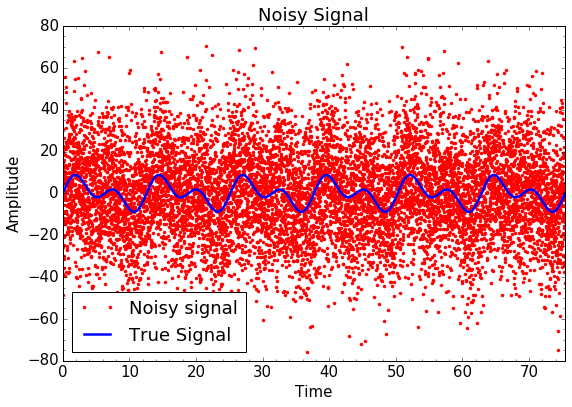

In [44]:
plt.figure(figsize=(9, 6))

plt.plot(t, An, 'r.', label="Noisy signal")
plt.plot(t, A, linewidth = 2.5, label="True Signal")
plt.legend(loc = "best")
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Noisy Signal')
plt.minorticks_on()
plt.xlim(0,24*np.pi);

The functions that we will use are **np.fft.fft** and **np.fft.fftfreq**. The frequencies for the values returned in the fft are stored in **np.fft.fftfreq**. The frequencies are returned starting at f=0 (DC) and then listed in ascending order, followed by descending order for negative values. We can then use our knowledge of array indexing to pull out the positive and negative values

In [45]:
fft = np.fft.fft(An)
freq = np.fft.fftfreq(npoints)
print "Frequencies returned:", freq
i_freq = np.arange(1,npoints//2)
pfreq = freq[i_freq]
nfreq = freq[-i_freq]
print "Positive frequencies:",freq[i_freq]

Frequencies returned: [  0.00000000e+00   9.99900010e-05   1.99980002e-04 ...,  -2.99970003e-04
  -1.99980002e-04  -9.99900010e-05]
Positive frequencies: [  9.99900010e-05   1.99980002e-04   2.99970003e-04 ...,   4.99650035e-01
   4.99750025e-01   4.99850015e-01]


From here it is easy to find the Power Spectral Density (PSD) to visually look at the dominant frequencies in our data. We expect to see them for wavelenths of 2$\pi$ and 4$\pi$. 

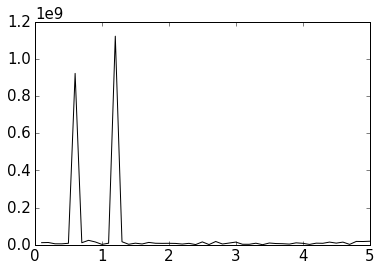

In [46]:
psd = np.abs(fft[i_freq])**2 + np.abs(fft[-i_freq])**2
plt.plot(pfreq*(n), psd, 'k-')
plt.xlim(0,5);

In [47]:
peaks, = np.where(psd > 0.5e9)
peakfreq = pfreq[peaks]
wave = 1/peakfreq
print wave * 24/npoints

[ 4.  2.]
